In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Data Visualization

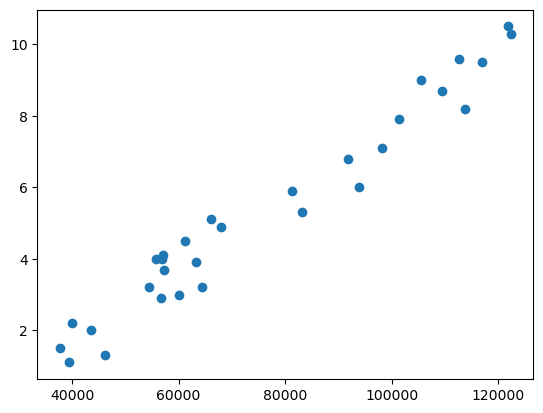

In [7]:
plt.scatter(df['Salary'],df['YearsExperience'])
plt.show()

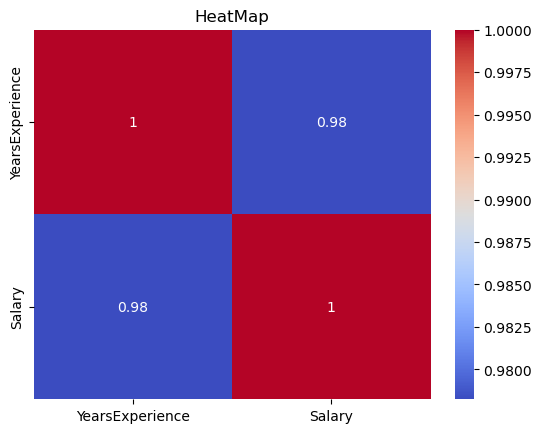

In [8]:
Corr = df.corr()

sns.heatmap(Corr,annot=True,cmap='coolwarm')
plt.title('HeatMap')
plt.show()

# Train & Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.iloc[:,:-1]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [11]:
y = df.iloc[:,-1:]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Robust

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
RB1 = RobustScaler()
RB2 = RobustScaler()

In [15]:
X_train_Rb = RB1.fit_transform(X_train)

In [16]:
X_test_Rb = RB1.transform(X_test)

In [17]:
y_train_Rb = RB2.fit_transform(y_train)

In [18]:
y_test_Rb = RB2.transform(y_test)

In [19]:
y_train_1d = np.ravel(y_train_Rb)

# Linear Regrression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
Lr = LinearRegression()

In [22]:
Lr.fit(X_train_Rb,y_train_Rb)

LinearRegression()

In [23]:
y_hat = Lr.predict(X_test_Rb)

In [24]:
y_test_1d = np.ravel(y_test_Rb)
y_hat_1d = np.ravel(y_hat)

Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
print(mean_squared_error(y_test_Rb,y_hat))

0.024223188604475015


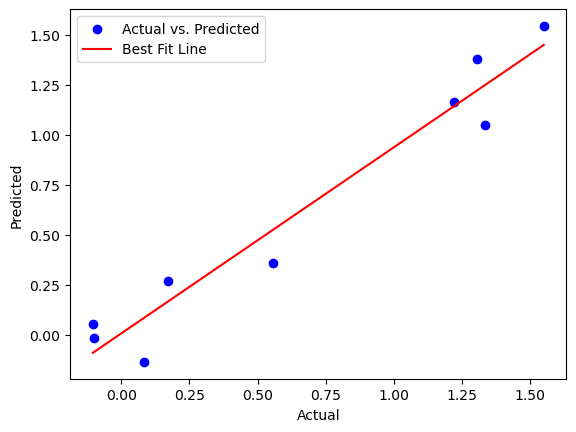

In [27]:
plt.scatter(y_test_Rb, y_hat, color='blue', label='Actual vs. Predicted')

best_fit_line = np.polyfit(y_test_1d, y_hat_1d, 1)
x = np.linspace(min(y_test_1d), max(y_test_1d), 100)
y = np.polyval(best_fit_line, x)

plt.plot(x, y, color='red', label='Best Fit Line')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

<h1><i>New Prediction</i></h1>

In [28]:
# Predict the salary for a new employee with 10 years of experience
new_employee_years_experience = 10
predicted_salary = Lr.predict([[new_employee_years_experience]])

print("The predicted salary for a new employee with 10 years of experience is:", predicted_salary)

The predicted salary for a new employee with 10 years of experience is: [[9.30046488]]


<h1><i>Performance Metrics</i></h1>

In [29]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean squared error
mae = mean_absolute_error(y_test_Rb, y_hat)

# Print the mean squared error
print(mae)


0.13068309179390247
